<a href="https://colab.research.google.com/github/Shiromasteven/Sales-predictions/blob/main/Copy_of_Sales_predicitons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = '/content/drive/MyDrive/sales_predictions (1).csv'

df = pd.read_csv(filename)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Because we have the store type column, and the size of the store can be inferenced by the type, I feel it is necessary to drop the Outlet_Size column.
#However for the item weight, as this is a large portion of information and can be filled in with a mean value of the item's weights based on their Item_Type avg.

df.groupby('Item_Type')['Item_Weight'].mean().round(2)

Item_Type
Baking Goods             12.28
Breads                   11.35
Breakfast                12.77
Canned                   12.31
Dairy                    13.43
Frozen Foods             12.87
Fruits and Vegetables    13.22
Hard Drinks              11.40
Health and Hygiene       13.14
Household                13.38
Meat                     12.82
Others                   13.85
Seafood                  12.55
Snack Foods              12.99
Soft Drinks              11.85
Starchy Foods            13.69
Name: Item_Weight, dtype: float64

In [ ]:
median_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(median_weight, inplace = True)

df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.drop(columns = 'Outlet_Size', inplace = True)


In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Weight'].min()

4.555

In [ ]:
def sumstats(df):
  print(df.min())
  print(df.max())
  print(df.mean())



In [ ]:
sumstats(df['Item_Weight'])


4.555
21.35
12.857645184136409


In [ ]:
sumstats(df['Item_Visibility'])

0.0
0.328390948
0.06613202877895127


In [ ]:
sumstats(df['Item_MRP'])

31.29
266.8884
140.9927819781768


In [ ]:
sumstats(df['Item_Outlet_Sales'])

33.29
13086.9648
2181.2889135750365


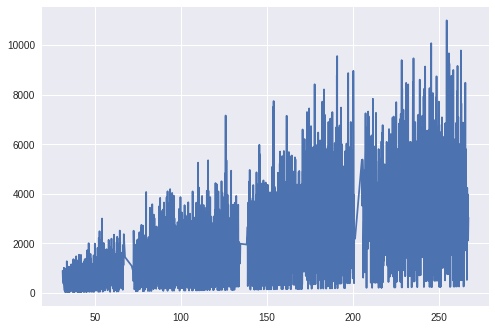

In [ ]:
df_sales_average = df.groupby('Item_MRP')['Item_Outlet_Sales'].mean()

plt.plot(df_sales_average)



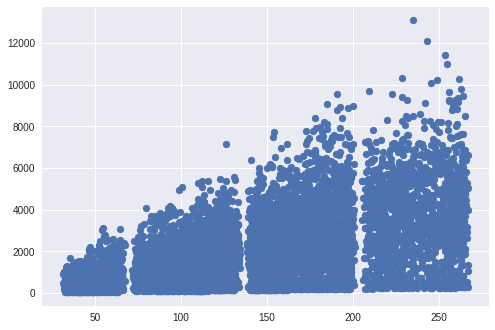

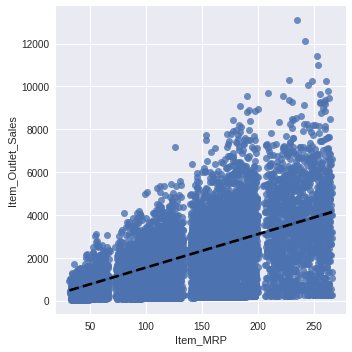

In [ ]:
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
sns.lmplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', line_kws={'color': 'black', 'ls': '--'}
)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0, 'Item Type')

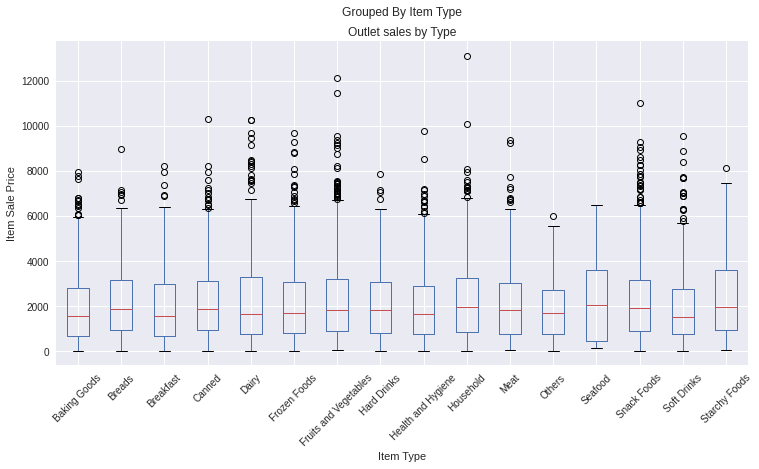

In [ ]:
#Here I am comparing the item type category with it's item sales to find higher than average sales, median sales, and overall market prices

#Item_Type_MRP = df.groupby('Item_Type')['Item_MRP']

df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type', figsize = (12,6));
plt.xticks(rotation = 45)
plt.title('Outlet sales by Type');
plt.suptitle('Grouped By Item Type');
plt.ylabel('Item Sale Price')
plt.xlabel('Item Type')

Text(0.5, 0, 'Item Price')

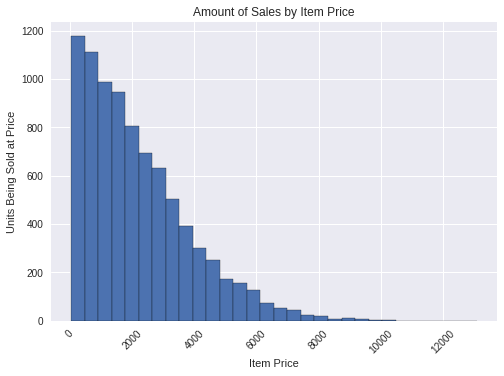

In [ ]:
#Here I am comparing the different types of stores and their sales margins.

#Change opacity, add seaborn, 
#plt.style.use('seaborn')
#df.groupby('Outlet_Type')['Item_Outlet_Sales'].hist(bins = 30,
#                                   edgecolor='black')
#plt.xticks(rotation = 45)
#plt.ticklabel_format(useOffset=False, style='plain')

plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins = 30,
                                   edgecolor='black')
plt.xticks(rotation = 45)

plt.title('Amount of Sales by Item Price');
plt.ylabel('Units Being Sold at Price')
plt.xlabel('Item Price')


In [ ]:
# Below we have a heat map of the Item weight, visibility, mrp and sales, with a correlation btween mrp and sales and an inverse correlation between visibility and the other variables.

In [ ]:
df_heat = df.drop(columns = ['Item_Identifier',	'Outlet_Identifier',	'Outlet_Establishment_Year',	'Outlet_Location_Type',	'Outlet_Type'])

In [ ]:
df_heat_corr = df_heat.corr()

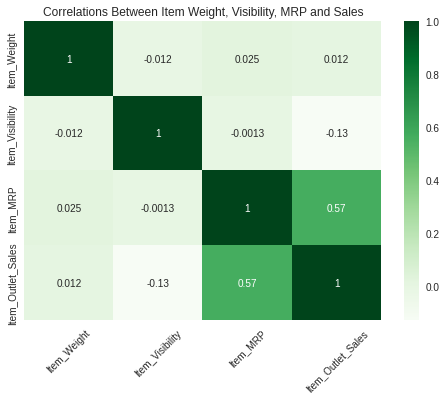

In [ ]:
sns.heatmap(df_heat_corr, cmap = 'Greens', annot = True);
plt.xticks(rotation = 45)
plt.title('Correlations Between Item Weight, Visibility, MRP and Sales');

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

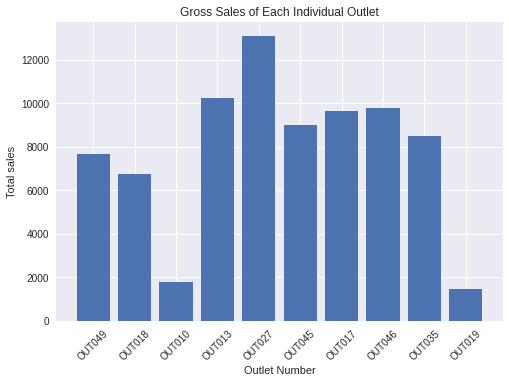

In [ ]:
#A bar graph of the different stores sales

plt.bar(df['Outlet_Identifier'], df['Item_Outlet_Sales'])
plt.ylabel('Total sales')
plt.xlabel('Outlet Number')
plt.title('Gross Sales of Each Individual Outlet')
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Gross Sales of Each Outlet Type')

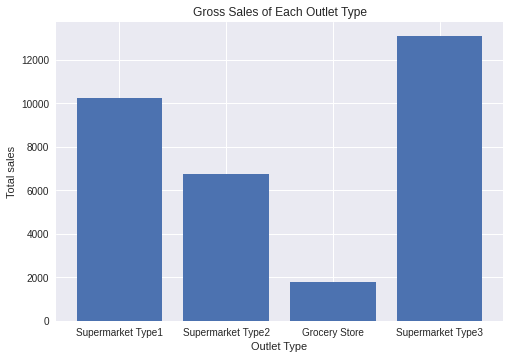

In [ ]:

plt.style.use('seaborn')
plt.bar(df['Outlet_Type'], df['Item_Outlet_Sales'])
plt.ylabel('Total sales')
plt.xlabel('Outlet Type')
plt.title('Gross Sales of Each Outlet Type')